In [1]:
import pandas as pd
import numpy as np

In [350]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [351]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [353]:
df.isnull().sum()/df.shape[0]*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [354]:
df.drop(['availability','area_type'],axis=1,inplace=True)

In [355]:
df

,location,size,society,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [356]:
drop_data = df.dropna()

In [357]:
drop_data.isnull().sum()

location      0
size          0
society       0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [358]:
num = []
for x in drop_data['size']:
    num.append(int(x[0]))

In [359]:
drop_data.insert(1,'BHK',num)

In [360]:
drop_data.drop('size',axis=1)

,location,BHK,society,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
3,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
5,Whitefield,2,DuenaTa,1170,2.0,1.0,38.00
11,Whitefield,4,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...
13313,Uttarahalli,3,Aklia R,1345,2.0,1.0,57.00
13314,Green Glen Layout,3,SoosePr,1715,3.0,3.0,112.00
13315,Whitefield,5,ArsiaEx,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.0,60.00


In [361]:
drop_data['total_sqft'] = pd.to_numeric(drop_data['total_sqft'],errors='coerce')

C:\Users\Anmino\AppData\Local\Temp\ipykernel_12592\1796916008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_data['total_sqft'] = pd.to_numeric(drop_data['total_sqft'],errors='coerce')


In [362]:
drop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7496 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7496 non-null   object 
 1   BHK         7496 non-null   int64  
 2   size        7496 non-null   object 
 3   society     7496 non-null   object 
 4   total_sqft  7337 non-null   float64
 5   bath        7496 non-null   float64
 6   balcony     7496 non-null   float64
 7   price       7496 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 527.1+ KB


In [363]:
sq = drop_data['total_sqft']
p = drop_data['price']

In [364]:
total = sq*p

In [365]:
drop_data.insert(7,'total_price_sqft',total)

In [126]:
drop_data.drop(['price','size'],axis=1,inplace=True)

C:\Users\Anmino\AppData\Local\Temp\ipykernel_12592\2994517478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_data.drop(['price','size'],axis=1,inplace=True)


In [392]:
drop_data.drop(['size'],axis=1,inplace=True)

C:\Users\Anmino\AppData\Local\Temp\ipykernel_12592\1384371297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_data.drop(['size'],axis=1,inplace=True)


In [395]:
drop_data

,location,BHK,total_sqft,bath,balcony,total_price_sqft,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,41257.92,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3.0,312000.00,120.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,144495.00,95.00
5,Whitefield,2,1170.0,2.0,1.0,44460.00,38.00
11,Whitefield,4,2785.0,5.0,3.0,821575.00,295.00
...,...,...,...,...,...,...,...
13313,Uttarahalli,3,1345.0,2.0,1.0,76665.00,57.00
13314,Green Glen Layout,3,1715.0,3.0,3.0,192080.00,112.00
13315,Whitefield,5,3453.0,4.0,0.0,797643.00,231.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,68460.00,60.00


In [396]:
b = drop_data['location']
new_data_set = pd.get_dummies(b)

In [397]:
new_data = drop_data.join(new_data_set)

In [398]:
new_data

,location,BHK,total_sqft,bath,balcony,total_price_sqft,price,Banaswadi,Bhoganhalli,Devarabeesana Halli,...,Volagerekallahalli,Whitefield,Wilson Garden,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb
0,Electronic City Phase II,2,1056.0,2.0,1.0,41257.92,39.07,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4,2600.0,5.0,3.0,312000.00,120.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3,1521.0,3.0,1.0,144495.00,95.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Whitefield,2,1170.0,2.0,1.0,44460.00,38.00,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11,Whitefield,4,2785.0,5.0,3.0,821575.00,295.00,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,Uttarahalli,3,1345.0,2.0,1.0,76665.00,57.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,Green Glen Layout,3,1715.0,3.0,3.0,192080.00,112.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,Whitefield,5,3453.0,4.0,0.0,797643.00,231.00,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,68460.00,60.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [399]:
new_data.dropna(inplace=True)

# VISULAIZATION

In [373]:
import matplotlib.pyplot as plt
import seaborn as sns

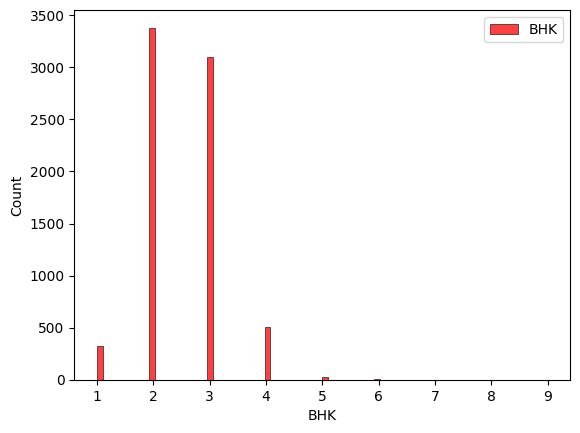

In [374]:
sns.histplot(x='BHK',data=new_data,color='r',label='BHK')
plt.legend()
plt.show()

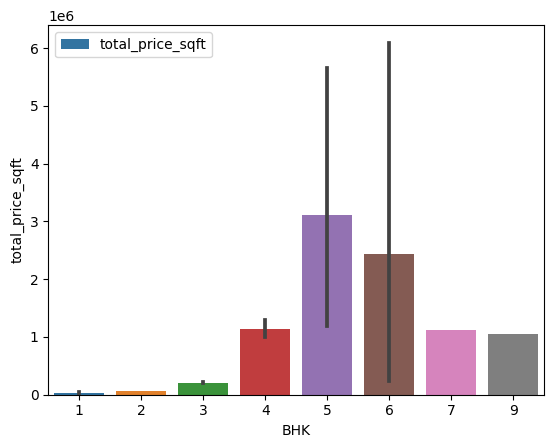

In [375]:
sns.barplot(x='BHK',y='total_price_sqft',data=new_data,label='total_price_sqft')
plt.legend()
plt.show()

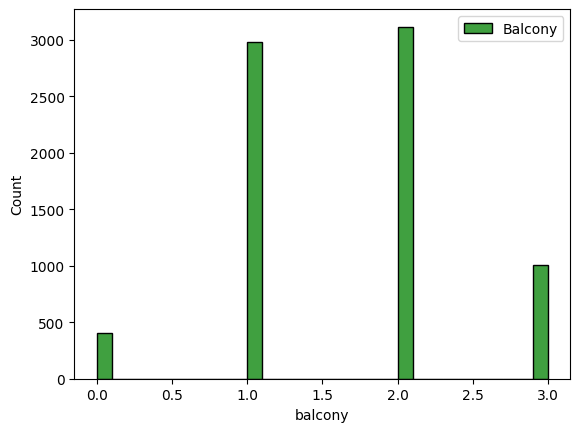

In [196]:
sns.histplot(new_data['balcony'],color='g',label='Balcony')
plt.legend()

C:\Users\Anmino\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


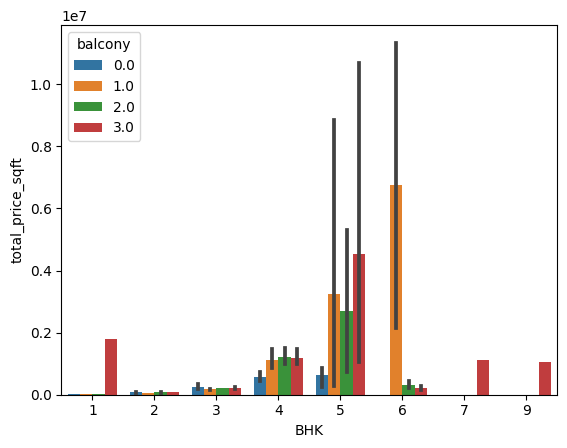

In [202]:
sns.barplot(x='BHK',y='total_price_sqft',hue='balcony',data=new_data)
plt.show()

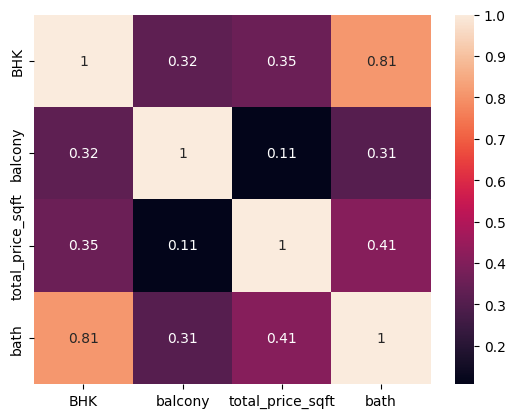

In [461]:
for_v = new_data[['BHK','balcony','total_price_sqft','bath']]
sns.heatmap(for_v.corr(),annot=True)
plt.show()

# FEATURE SCALING AND WITH STANDARD SCALING

In [488]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessRegressor

In [472]:
x = new_data.drop(['total_price_sqft','location','price','bath'],axis=1)
y = new_data['total_price_sqft']

In [473]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [474]:
min_scale = MinMaxScaler()
min_scale.fit(x_train)

MinMaxScaler()

In [475]:
x_train = min_scale.transform(x_train)
x_test = min_scale.transform(x_test)

In [476]:
std_scale = StandardScaler()
std_scale.fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [477]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [478]:
model.score(x_test,y_test)

0.8302970668702462

In [489]:
print(explained_variance_score(y_test,model.predict(x_test)))

0.8309287760423566


In [491]:
import joblib

In [492]:
joblib.dump(model,'House_predict.pkl')

['House_predict.pkl']

In [4]:
import streamlit